Ejercicio 1) item a y c

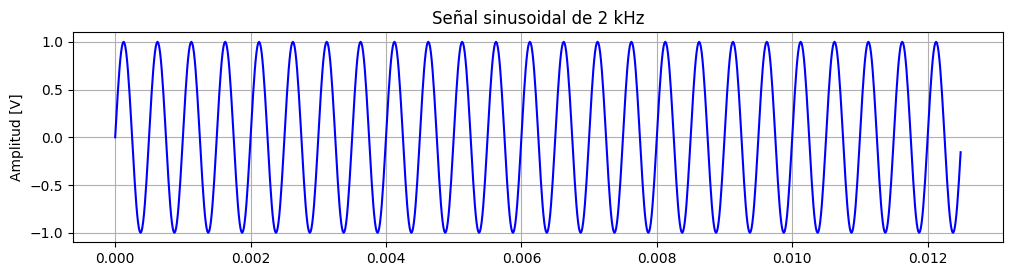

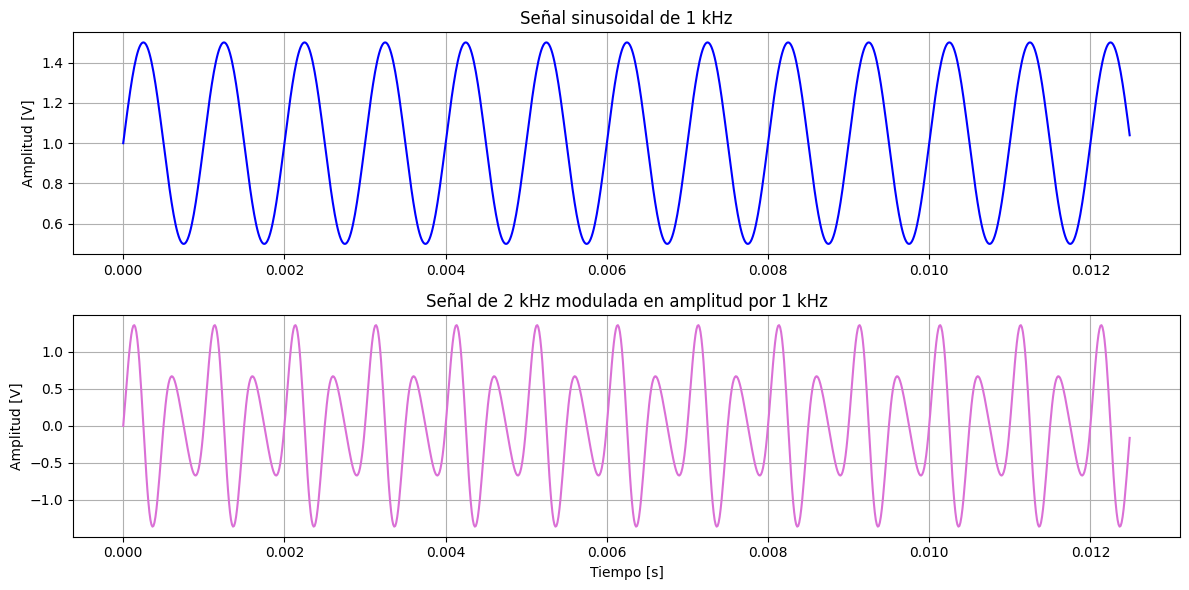

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=80000):
    t = np.arange(0, nn) / fs
    x = dc + vmax * np.sin(2 * np.pi * ff * t + ph)
    return t, x

N = 1000
fs = 80000  # Frecuencia de muestreo alta para ver bien la señal
f0 = 2000   # Frecuencia de la señal principal (2 kHz)

# 1. Señal sinusoidal de 2 kHz
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=f0, ph=0, nn=N, fs=fs)

# 2. Señal moduladora en amplitud por otra de la mitad de la frecuencia (1 kHz)
m = 1 + 0.5 * np.sin(2 * np.pi * (f0/2) * tt)
xx3 = m * xx #modulacion

# Graficar ambas señales
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(tt, xx, color='blue')
plt.title("Señal sinusoidal de 2 kHz")
plt.ylabel("Amplitud [V]")
plt.grid(True)

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(tt, m, color='blue')
plt.title("Señal sinusoidal de 1 kHz")
plt.ylabel("Amplitud [V]")
plt.grid(True)


plt.subplot(2,1,2)
plt.plot(tt, xx3, color='orchid')
plt.title("Señal de 2 kHz modulada en amplitud por 1 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

plt.tight_layout()
plt.show()

Item de la potencia. Normalizamos la amplitud, es decir, A=1.
Potencia = (A)^2/2, t= 0.75*0.5
Tenemos que recortar la amplitud, no la potencia.

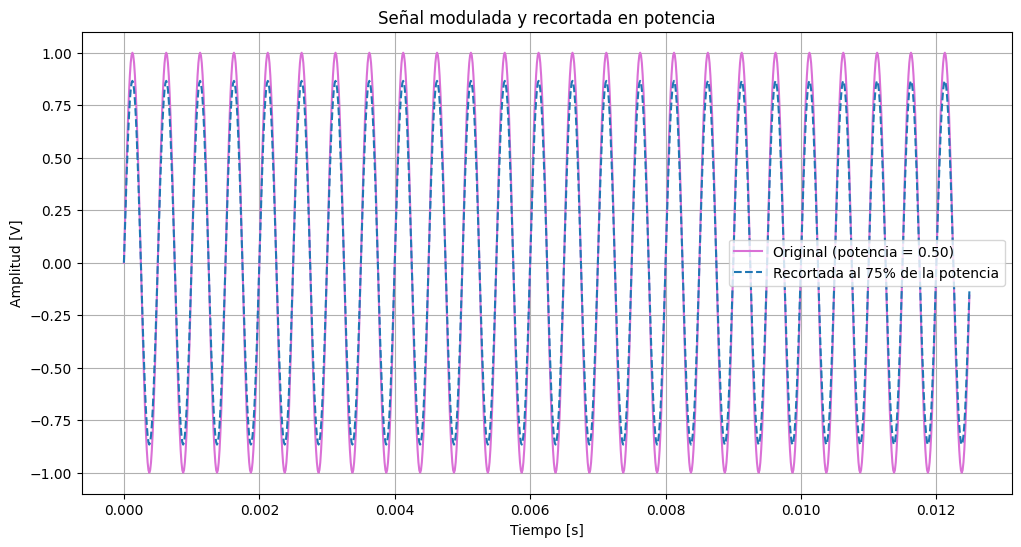

In [11]:
# Señal original (modulada)
potencia_original = np.mean(xx**2)

# Queremos que la nueva potencia sea el 75% de la original
potencia_deseada = 0.75 * potencia_original

# El factor de escala es la raíz cuadrada de (potencia_deseada / potencia_original)
factor = np.sqrt(potencia_deseada / potencia_original)

# Señal recortada en potencia
xx_recortada = xx * factor

# Graficar ambas señales para comparar
plt.figure(figsize=(12, 6))
plt.plot(tt, xx, label="Original (potencia = {:.2f})".format(potencia_original), color='orchid')
plt.plot(tt, xx_recortada, label="Recortada al 75% de la potencia", linestyle='--')
plt.title("Señal modulada y recortada en potencia")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid(True)
plt.show()